In [78]:
import warnings
import numpy as np
import pandas as pd
import numpy.linalg as lg
import seaborn as sbn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [51]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3, linewidth=120)

### Loading Data set

In [52]:
x_org = np.loadtxt("../data/rin.dat")  #  data matrix

print("number of entities:", x_org.shape[0], ", number of features:", x_org.shape[1])

with open("../data/namrin", 'r') as fp:  # load names as list of string
    names_ = fp.readlines()

with open("../data/varrin", 'r') as fp:  # load features names as list of string
    features_ = fp.readlines()

number of entities: 91 , number of features: 5


### Creating Pandas DataFrame for Visualization


In [53]:
names = [name.strip() for name in names_]
features = [feature.strip().split(",")[0] for feature in features_]
# features

df = pd.DataFrame(data=x_org, columns=features[:-1], index=names[1:])
df.head()

,'Internet abonents,'Personal abon.,'Company abon.,'Mobile Int. user,'Storage
'Central',212.316,199.597,12.719,838.953,231.933
'Belgorod',248.517,236.956,11.558,963.444,361.539
'Bryansk',192.963,178.115,14.848,717.172,174.693
'Vladimir',155.780,145.530,10.250,649.882,202.636
'Voronezh',193.378,181.890,11.489,680.391,247.181


In [54]:
def standardizer(x):
    
    """
        standardize entity-to-feature data matrix by 
          applying Z-scoring, Range standardization and Rank methods
        
        Arguments: 
            x, numpy array, entity-to-feature data matrix
        Returns:
            Z-scored and Range standardized data matrices, x_zscore, x_range, x_rank.
    """
    
    x_ave = np.mean(x, axis=0)
    x_min = np.min(x, axis=0)
    x_rng = np.ptp(x, axis=0)
    x_std = np.std(x, axis=0)
    x_zscore = np.divide(np.subtract(x, x_ave), x_std)   # Z-scoring standardization
    x_range = np.divide(np.subtract(x, x_ave), x_rng)  # Range standardization 
    x_rank = np.divide(np.subtract(x, x_min), x_rng) # Rank standardization 
    return x_zscore, x_range, x_rank


In [55]:
def singular_decomposition(x):
    z, mu, c = np.linalg.svd(x, full_matrices=True)  
    z = -z
    c = -c 
    mu_arg_max = np.argmax(mu)
#     print("Shape: ", z.shape, mu.shape, c.shape)
#     print("mu:", mu)
#     print("loadings:", )
#     print(c)
#     print(" ")
    
    n_contributions = np.power(mu, 2)
    ds = np.sum(np.power(x, 2))  # Data Scatter

    # Determine contributions of all the principal components to the data scatter 
    p_contributions = np.divide(n_contributions, ds)
#     print("natural contributions:", n_contributions)
#     print("percent contributions:", 100*p_contributions)
    
    return z, mu, c, ds, n_contributions, p_contributions, mu_arg_max

#### Part 1

- In your data set, select a subset of 3-6 features related to the same aspect and explain your choice:


Explanation: Except for the last feature in which it has a weak correlations with the other features, I keep the four remaining features.

In [79]:
x_selected = x_org[:, :4]  # selected set of features
x_selected.shape

(91, 4)

#### Part 2:
- Standardize the selected subset;
- Compute its data scatter and SVD;
- Determine contributions of all the principal components
to the data scatter, naturally and per cent

In [57]:
# x_selected = np.array([[41, 66, 90], [57, 56, 60], [61, 72, 79], [69, 73, 72], [63, 52, 88], [62, 83, 80]])

In [58]:
x_zscore, x_range, x_rank = standardizer(x=x_selected)

In [80]:
# Singular decomposition on original data 
z_x, mu_x, c_x, ds_x, n_contributions_x, p_contributions_x, mu_argmax_x = \
singular_decomposition(x=x_selected)

In [81]:
# Singular decomposition on Z-Scored standardized data
z_x_zscore, mu_x_zscore, c_x_zscore, ds_x_zscore,\
n_contributions_x_zscore, p_contributions_x_zscore, mu_argmax_x_zscore  = \
singular_decomposition(x=x_zscore)

In [82]:
# Singular decomposition on Range standardized data
z_x_range, mu_x_range, c_x_range, ds_x_range,\
n_contributions_x_range, p_contributions_x_range,mu_argmax_x_range = \
singular_decomposition(x=x_range)

In [83]:
# Singular decomposition on Rank standardized data
z_x_rank, mu_x_rank, c_x_rank, ds_x_rank,\
n_contributions_x_rank, p_contributions_x_rank, mu_argmax_x_rank = \
singular_decomposition(x=x_rank)

In [85]:
print("Natural contributions of \n",
      "Original data       :", n_contributions_x, "\n",
      "Ranked std data     :", n_contributions_x_rank, "\n",
      "Ranged std data     :", n_contributions_x_range, "\n",
      "Z-Scored std data   :", n_contributions_x_zscore,)

Natural contributions of 
 Original data       : [61732346.585   520959.304     2660.014        1.224] 
 Ranked std data     : [83.69   1.632  0.742  0.   ] 
 Ranged std data     : [7.628 1.18  0.637 0.   ] 
 Z-Scored std data   : [267.149  58.957  37.894   0.   ]


- Notice the differences in the values w.r.t different pre-processing methods
- The first component always contribute to the most

In [87]:
print("Percent contributions of \n",
      "Original data       :", 100*p_contributions_x, "\n",
      "Ranked std data     :", 100*p_contributions_x_rank, "\n",
      "Ranged std data     :", 100*p_contributions_x_range, "\n",
      "Z-Scored std data   :", 100*p_contributions_x_zscore,)

Percent contributions of 
 Original data       : [99.159  0.837  0.004  0.   ] 
 Ranked std data     : [97.241  1.896  0.863  0.   ] 
 Ranged std data     : [80.761 12.497  6.741  0.   ] 
 Z-Scored std data   : [73.393 16.197 10.41   0.   ]


- Considering ranked standardized data [97.241  1.896  0.863  0.   ] : 
    - First component contribution is equal to 97.2% 
    - Second component contribution is  equal to 1.9% 

    

In [90]:
print("loadings of 1st component \n",
      "Original data       :", c_x[mu_argmax_x, :], "\n",
      "Rank std data     :", c_x_rank[mu_argmax_x_rank, :], "\n",
      "Range std data     :", c_x_range[mu_argmax_x_range, :], "\n",
      "Z-Score std data   :", c_x_zscore[mu_argmax_x_zscore, :],)

loadings of 1st component 
 Original data       : [0.232 0.217 0.015 0.948] 
 Rank std data     : [0.573 0.568 0.255 0.532] 
 Range std data     : [0.646 0.634 0.323 0.277] 
 Z-Score std data   : [0.554 0.542 0.479 0.412]


- Considering ranked standardized data:  c1 = [ 0.573  0.568  0.255   0.532]
    - interpretation: all loadings are positive and more or less equal to each other except for c2 = 0.255. Meaning the factor expresses the level of internetization of regions.


- np.linagl.svd produces the eigenvectors in rows, not columns.

#### Part 3

- Compute and interpret a hidden ranking factor behind the selected features. The factor should be expressed in a 0-100 rank scale (as well as the features – ranking normalization).

To scale to 0-100, one needs to find $\alpha$ using the following Eqn.

$ z_{1} = \alpha \times( 100*c_{1,1} + ... + 100 \times 1*c_{1,v}) $ 


By assigning 100 to $z_{1}$ we have:

$\alpha = \frac{100}{\sum_{i=1}^{V} c_{1,i}}$

Where $V$ is the number of features

In [93]:
def part_3(x, z, c, mu, argmax):    
    z1 = z[:, argmax]  # hiden score
    c1 = c[argmax, :]  # loading
    mu1 = mu[argmax] 
    print("c1             :", c1)
    alpha = 1/np.sum(c1)
    loading = c1*alpha  
    print("Loading        :", loading)
    ranking_factors = 100*x@(loading)  # ranking factors
#     print("ranking_factors shape:", ranking_factors.shape)
    arg_top5 = np.argsort(ranking_factors)[::-1][:5]
    top_5 = np.sort(ranking_factors,)[::-1][:5]
    
    print("Top5 regions:", top_5)
    return loading, ranking_factors, arg_top5


In [94]:
# Original data
# _, _, _ = part_3(x=x_selected, z=z_x, c=c_x, mu=mu_x, argmax=mu_argmax_x)

In [109]:
# Rank standardized :
_, _, arg_top5 =\
part_3(x=x_rank, z=z_x_rank, c=c_x_rank, mu=mu_x_rank, argmax=mu_argmax_x_rank)

c1             : [0.573 0.568 0.255 0.532]
Loading        : [0.297 0.295 0.132 0.276]
Top5 regions: [95.199 83.76  79.595 68.136 65.653]


In [97]:
for i in arg_top5:
    print(names[i])

'Spetersburg'
'Moscow_City'
'Novosibirsk'
'Karelia'
'Tumen'


- This shows that there is no perfect region.( Becuase the maximum value of all ranking factor is not 100%)
- And moreover, Spetersburg is best internet performer.
- 

In [ ]:
# Rank standardized :
_, _, arg_top5 =\
part_3(x=x_zscore, z=z_x_zscore, c=c_x_zscore, mu=mu_x_zscore, argmax=mu_argmax_x_rank)

#### Part 4:

Visualize the data using two first principal components at the
standardization with two versions of standardization: 
- (a) range standardization
- (b) z-scoring

In [98]:
subset = np.where(x_org[:, -1] >= 300.)[0] 
print(subset)

[ 1 14 19 20 21 27 30 78 83]


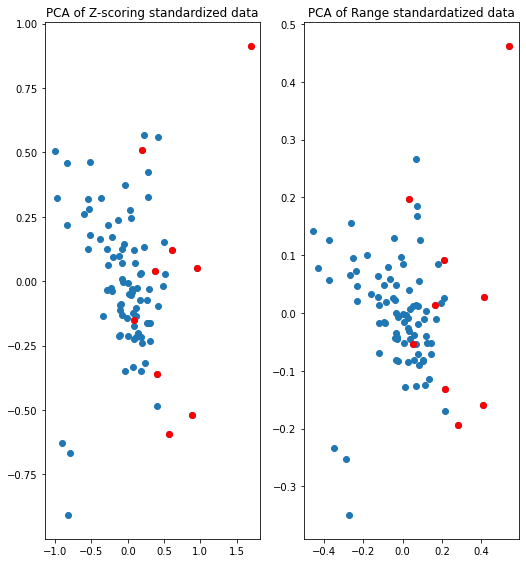

In [110]:
z_z0 = z_x_zscore[:, 0]*np.sqrt(mu_x_zscore[0])
z_z1 = z_x_zscore[:, 1]*np.sqrt(mu_x_zscore[1])

z_r0 = z_x_range[:, 0]*np.sqrt(mu_x_range[0])
z_r1 = z_x_range[:, 1]*np.sqrt(mu_x_range[1])
fig = plt.figure(figsize=(8.5, 9.5))

ax = fig.add_subplot(121)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[subset], z_z1[subset], c='r',)
plt.title("PCA of Z-scoring standardized data")

ax = fig.add_subplot(122)
ax.scatter(z_r0, z_r1)
ax.scatter(z_r0[subset], z_r1[subset], c='r',)

plt.title("PCA of Range standardatized data")
plt.show()

- These red points are scattered over the second component. But more or less correspond to higher values of the first component.

- As one can see the difference is only in the scaling of these two figures

In [115]:
# Loadings:
c_x_zscore[:3, :]

array([[ 0.554,  0.542,  0.479,  0.412],
       [-0.365, -0.404,  0.173,  0.821],
       [-0.18 , -0.274,  0.858, -0.396]])

- Interpretations should go here

#### Conventional PCA


In [104]:
def conventional_pca(X, standardized=False):    
    # Let us name x as original data set, 
    # restricted at selected subset of features, i.e. x_selected.
    if standardized is False:
        mean_x = np.mean(X, axis=0)
        Y = np.subtract(X, mean_x)  # centered version
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)  # Eigenvalues 
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        B_dot = B - la1*np.multiply(c1, c1.T)  # Residual of Cov.
        L_, C_ = np.linalg.eig(B_dot)
        argmax_ = np.argmax(L_)
        la2 = L_[argmax_]
        c2 = C_[:, argmax_]
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    else:
        Y = X
        B = (Y.T@Y)/Y.shape[0]  # covariance matrix of Y
        L, C = np.linalg.eig(B)
        sorted_idx = np.argsort(L)[::-1]  # descending order
        la1 = L[sorted_idx[0]]
        c1 = C[:, sorted_idx[0]]  # unlike np.linalg.svd now we should consider the column
        pc1 = np.divide(Y@c1, np.sqrt(Y.shape[0]*la1))  # 1st principle component    
        la2 = L[sorted_idx[1]]
        c2 = -C[:, sorted_idx[1]]  # unlike np.linalg.svd now we should consider the column
        pc2 = np.divide(Y@c2, np.sqrt(Y.shape[0]*la2))  # 2nd principle component 
    
    return pc1, pc2

In [105]:
pc1_x, pc2_x = conventional_pca(X=x_selected, standardized=False)

In [101]:
pc1_x_z, pc2_x_z = conventional_pca(X=x_zscore, standardized=True)

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcas = pca.fit_transform(x_zscore)
pc1, pc2 = pcas[:, 0], pcas[:, 1]

### Putting all together

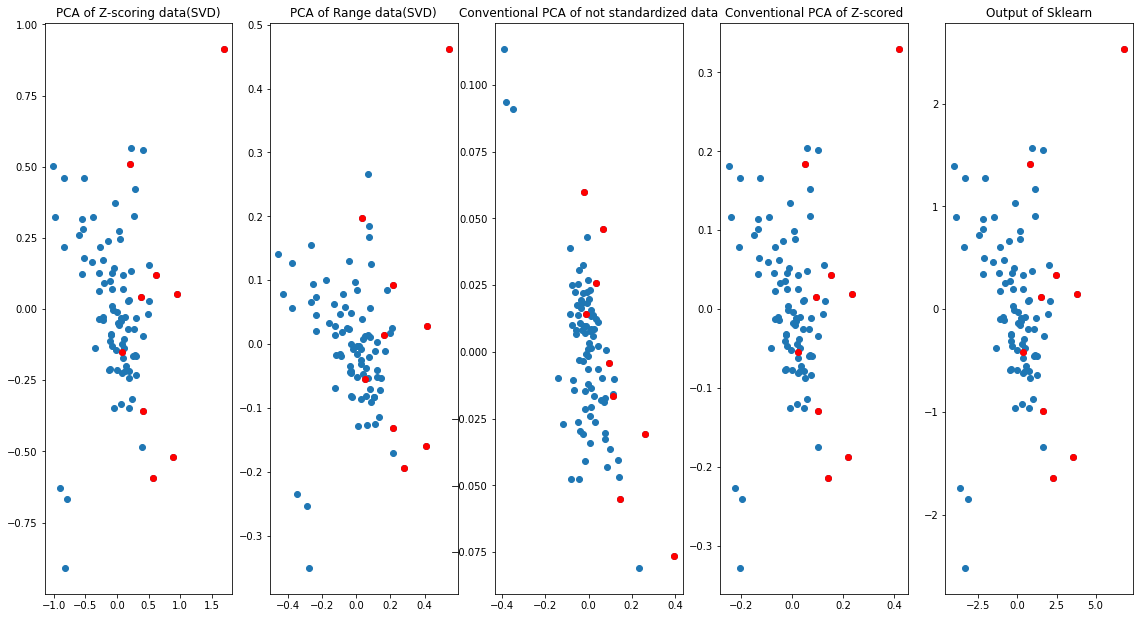

In [108]:
fig = plt.figure(figsize=(19.5, 10.5))

ax = fig.add_subplot(151)
ax.scatter(z_z0, z_z1)
ax.scatter(z_z0[subset], z_z1[subset], c='r',)
plt.title("PCA of Z-scoring data(SVD)")

ax = fig.add_subplot(152)
plt.scatter(z_r0, z_r1)
ax.scatter(z_r0[subset], z_r1[subset], c='r',)
plt.title("PCA of Range data(SVD)")

ax = fig.add_subplot(153)
ax.scatter(pc1_x, pc2_x)
ax.scatter(pc1_x[subset], pc2_x[subset], c='r',)
plt.title("Conventional PCA of not standardized data")

ax = fig.add_subplot(154)
ax.scatter(pc1_x_z, pc2_x_z)
ax.scatter(pc1_x_z[subset], pc2_x_z[subset], c='r',)
plt.title("Conventional PCA of Z-scored")

ax = fig.add_subplot(155)
ax.scatter(pc1, pc2)
ax.scatter(pc1[subset], pc2[subset], c='r',)
plt.title("Output of Sklearn")

plt.show()



- For all Z-scored data, i.e 1st, 4th, 5th panes, PCA plots are indeed similar
- Note the subtle difference between 3rd and 4th panes, the difference mostly comes from the range data, plus symmetry over X axis.

In [77]:
# fig = plt.figure(figsize=(19.5, 10.5))

# ax = fig.add_subplot(141)
# ax.scatter(z_z0, z_z1)
# ax.scatter(z_z0[subset], z_z1[subset], c='r',)
# plt.title("PCA of Z-scoring standardized data(SVD)")

# ax = fig.add_subplot(142)
# plt.scatter(z_r0, z_r1)
# ax.scatter(z_r0[subset], z_r1[subset], c='r',)
# plt.title("PCA of range standardatized data(SVD)")

# ax = fig.add_subplot(143)
# ax.scatter(pc1_x, pc2_x)
# ax.scatter(pc1_x[subset], pc2_x[subset], c='r',)
# plt.title("Conventional PCA")

# ax = fig.add_subplot(144)
# ax.scatter(pc1_x_z, pc2_x_z)
# ax.scatter(pc1_x_z[subset], pc2_x_z[subset], c='r',)
# plt.title("Conventional PCA of Z-scored Data")


# plt.show()

